# SVM Poynomial Kernel

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

In [3]:
def generate_circle_data(n_samples=1500, noise=0.10, random_state=46):
    """
    Generate two concentric circles dataset.

    Parameters:
    -----------
    n_samples : int
        The total number of points generated
    noise : float
        Standard deviation of Gaussian noise added to the data
    random_state : int
        Random seed for reproducibility

    Returns:
    --------
    X : array of shape [n_samples, 2]
        The generated samples
    y : array of shape [n_samples]
        The integer labels (0 or 1) for class membership of each sample
    """
    return make_circles(n_samples=n_samples, 
                       noise=noise, 
                       random_state=random_state)

In [4]:
def plot_2d_data(X, y, title="2D Circle Dataset"):
    """
    Plot the 2D dataset with different colors for each class.

    Parameters:
    -----------
    X : array-like of shape (n_samples, 2)
        The input samples
    y : array-like of shape (n_samples,)
        The target values (class labels)
    title : str
        The title of the plot
    """
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y, marker='.', cmap='viridis')
    plt.title(title)
    plt.xlabel('X₁')
    plt.ylabel('X₂')
    plt.colorbar(label='Class')
    plt.grid(True, alpha=0.3)
    plt.show()

In [5]:
def transform_to_3d(X):
    """Transform 2D data to 3D using radius-based transformation"""
    X1 = X[:, 0].reshape(-1, 1)
    X2 = X[:, 1].reshape(-1, 1)
    # Modified transformation to create better separation
    X3 = X1**2 + X2**2
    return np.hstack((X1, X2, X3))

In [6]:
def plot_3d_transformation_with_separator(X_transformed, y, title="3D Transformed Dataset with Linear Separator"):
    """Plot the 3D transformed dataset with a clear linear separating plane"""

    # Scale the transformed features
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X_transformed)

    # Fit linear SVM with adjusted parameters for better separation
    svm = LinearSVC(C=1.0, dual="auto", max_iter=5000)
    svm.fit(X_scaled, y)

    # Create the 3D plot
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Plot the two classes with different colors and markers for clarity
    class_0 = y == 0
    class_1 = y == 1

    ax.scatter(X_transformed[class_0, 0], 
              X_transformed[class_0, 1], 
              X_transformed[class_0, 2],
              c='blue', 
              marker='o',
              label='Class 0',
              alpha=0.6)

    ax.scatter(X_transformed[class_1, 0], 
              X_transformed[class_1, 1], 
              X_transformed[class_1, 2],
              c='red', 
              marker='^',
              label='Class 1',
              alpha=0.6)

    # Create a grid for the separator plane
    x_min, x_max = X_transformed[:, 0].min() - 0.2, X_transformed[:, 0].max() + 0.2
    y_min, y_max = X_transformed[:, 1].min() - 0.2, X_transformed[:, 1].max() + 0.2

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 50),
                        np.linspace(y_min, y_max, 50))

    # Get the separating plane coefficients
    w = svm.coef_[0]
    b = svm.intercept_[0]

    # Calculate z coordinates of the plane
    grid_points = np.c_[xx.ravel(), yy.ravel(), np.zeros(xx.ravel().shape[0])]
    scaled_grid = scaler.transform(grid_points)

    # Calculate the separator plane
    z = (-w[0] * scaled_grid[:, 0] - w[1] * scaled_grid[:, 1] - b) / w[2]
    z = z.reshape(xx.shape)
    z = scaler.inverse_transform(np.c_[xx.ravel(), yy.ravel(), z.ravel()])[:, 2].reshape(xx.shape)

    # Plot the separating plane with adjusted transparency
    surface = ax.plot_surface(xx, yy, z, alpha=0.3, cmap='coolwarm')

    # Customize the plot
    ax.set_xlabel('X₁')
    ax.set_ylabel('X₂')
    ax.set_zlabel('X₁² + X₂²')
    ax.set_title(title)

    # Add legend
    ax.legend()

    # Adjust the viewing angle for better visualization
    ax.view_init(elev=20, azim=45)

    # Add text description
    ax.text2D(0.05, 0.95, 
              "Polynomial Kernel Transformation:\nΦ(x₁,x₂) → (x₁,x₂,x₁²+x₂²)", 
              transform=ax.transAxes, 
              bbox=dict(facecolor='white', alpha=0.8))

    plt.show()

In [7]:
# Generate and plot the dataset
X, y = generate_circle_data(n_samples=1000, noise=0.05, random_state=46)

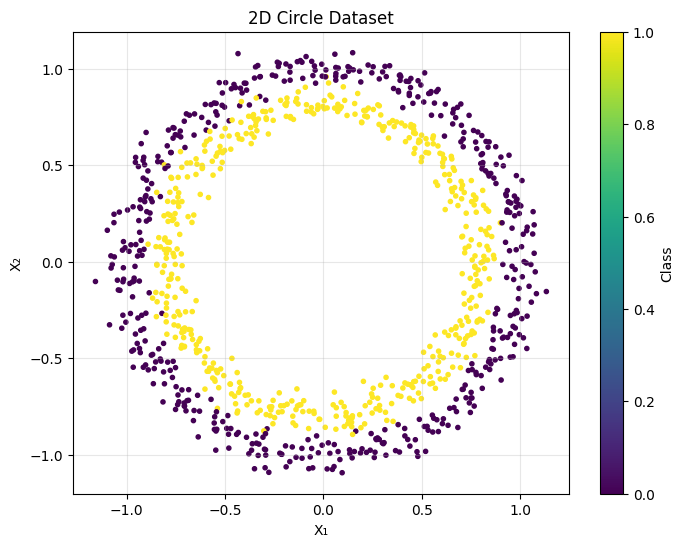

In [8]:
plot_2d_data(X,y)

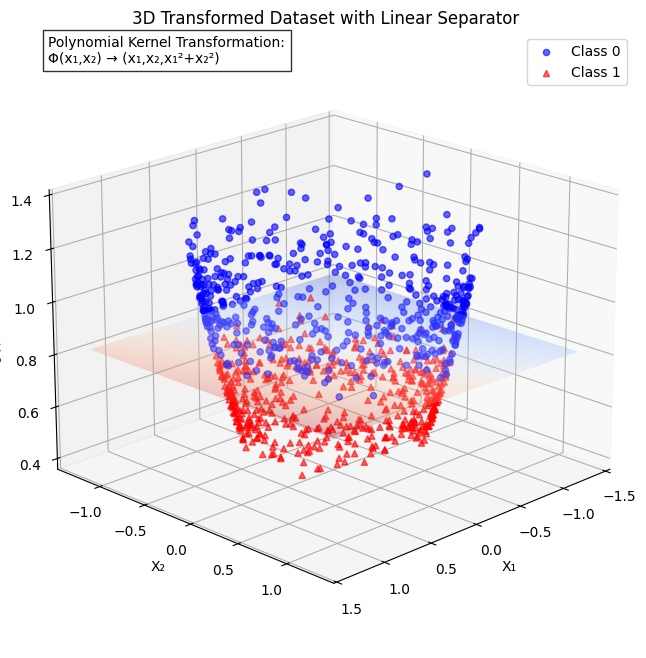

In [9]:
# Transform and plot 3D data with clear separator
X_transformed = transform_to_3d(X)
plot_3d_transformation_with_separator(X_transformed, y)